**Heart Disease classification using Machine Learning**

Import libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

ModuleNotFoundError: No module named 'pandas'

Load dataset

In [ ]:
data = pd.read_csv("heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Display dataset information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Count of data of each label

In [ ]:
data.HeartDisease.value_counts()

,count
HeartDisease,
1,508
0,410


Data visualization

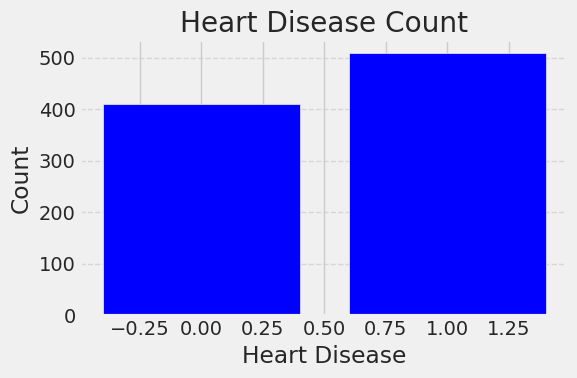

In [ ]:
import matplotlib.pyplot as plt

# Assuming `data` is a pandas DataFrame and `HeartDisease` is a column in it
heart_disease_counts = data.HeartDisease.value_counts()

# Plotting the bar chart using matplotlib
plt.figure(figsize=(6, 4))  # width=500px, height=350px equivalent
plt.bar(heart_disease_counts.index, heart_disease_counts.values, color='blue')
plt.title("Heart Disease Count")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Handling Missing Value

In [ ]:
data.isna().sum()

NameError: name 'data' is not defined

Normalization of data

In [ ]:
# Normalize data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']] = scaler.fit_transform(data[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']])
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,M,ATA,0.70,0.479270,0.0,Normal,0.788732,N,0.295455,Up,0
1,0.428571,F,NAP,0.80,0.298507,0.0,Normal,0.676056,N,0.409091,Flat,1
2,0.183673,M,ATA,0.65,0.469320,0.0,ST,0.267606,N,0.295455,Up,0
3,0.408163,F,ASY,0.69,0.354892,0.0,Normal,0.338028,Y,0.465909,Flat,1
4,0.530612,M,NAP,0.75,0.323383,0.0,Normal,0.436620,N,0.295455,Up,0


Standardization of data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for standardization
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the selected numerical columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,M,ATA,0.410909,0.825070,0.0,Normal,1.382928,N,-0.832432,Up,0
1,-0.478484,F,NAP,1.491752,-0.171961,0.0,Normal,0.754157,N,0.105664,Flat,1
2,-1.751359,M,ATA,-0.129513,0.770188,0.0,ST,-1.525138,N,-0.832432,Up,0
3,-0.584556,F,ASY,0.302825,0.139040,0.0,Normal,-1.132156,Y,0.574711,Flat,1
4,0.051881,M,NAP,0.951331,-0.034755,0.0,Normal,-0.581981,N,-0.832432,Up,0


Data encoding

In [ ]:
# Data encoding
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Iterate over object columns and encode them
for column in data.select_dtypes(include=['object']).columns:
    data[column] = encoder.fit_transform(data[column])

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.410909,0.825070,0.0,1,1.382928,0,-0.832432,2,0
1,-0.478484,0,2,1.491752,-0.171961,0.0,1,0.754157,0,0.105664,1,1
2,-1.751359,1,1,-0.129513,0.770188,0.0,2,-1.525138,0,-0.832432,2,0
3,-0.584556,0,0,0.302825,0.139040,0.0,1,-1.132156,1,0.574711,1,1
4,0.051881,1,2,0.951331,-0.034755,0.0,1,-0.581981,0,-0.832432,2,0


Outlier detection

In [ ]:
# Outlier detection using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detect outliers for each numerical column
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for col in numerical_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"Outliers in {col}:\n{outliers}")

Outliers in Age:
Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []
Outliers in RestingBP:
          Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
109 -1.539213    1              1   3.113018     0.386011        0.0   
123  0.476173    0              1   2.572596     1.776366        0.0   
189 -0.054192    1              0   2.572596     0.788482        0.0   
190 -0.796702    1              0   2.572596     0.742747        0.0   
241  0.051881    1              0   3.653439    -0.007314        0.0   
274 -0.902775    0              1   2.572596     0.879953        0.0   
275  0.582246    1              2   2.572596     0.129892        0.0   
278  0.370100    0              0   2.572596     1.355601        0.0   
314 -0.054192    1              0  -2.831621    -1.818435        0.0   
365  1.112610    0              0   3.653439    -1.818435        0.0   
372 

Outlier removal

In [ ]:
# Outlier detection using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

for col in numerical_cols:
  outliers = detect_outliers_iqr(data,col)
  print(f"Outliers in {col}:\n{outliers}")

Outliers in Age:
Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []
Outliers in RestingBP:
          Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
109 -1.539213    1              1   3.113018     0.386011        0.0   
123  0.476173    0              1   2.572596     1.776366        0.0   
189 -0.054192    1              0   2.572596     0.788482        0.0   
190 -0.796702    1              0   2.572596     0.742747        0.0   
241  0.051881    1              0   3.653439    -0.007314        0.0   
274 -0.902775    0              1   2.572596     0.879953        0.0   
275  0.582246    1              2   2.572596     0.129892        0.0   
278  0.370100    0              0   2.572596     1.355601        0.0   
314 -0.054192    1              0  -2.831621    -1.818435        0.0   
365  1.112610    0              0   3.653439    -1.818435        0.0   
372 

# Correlation Matrix

(12.5, -0.5)

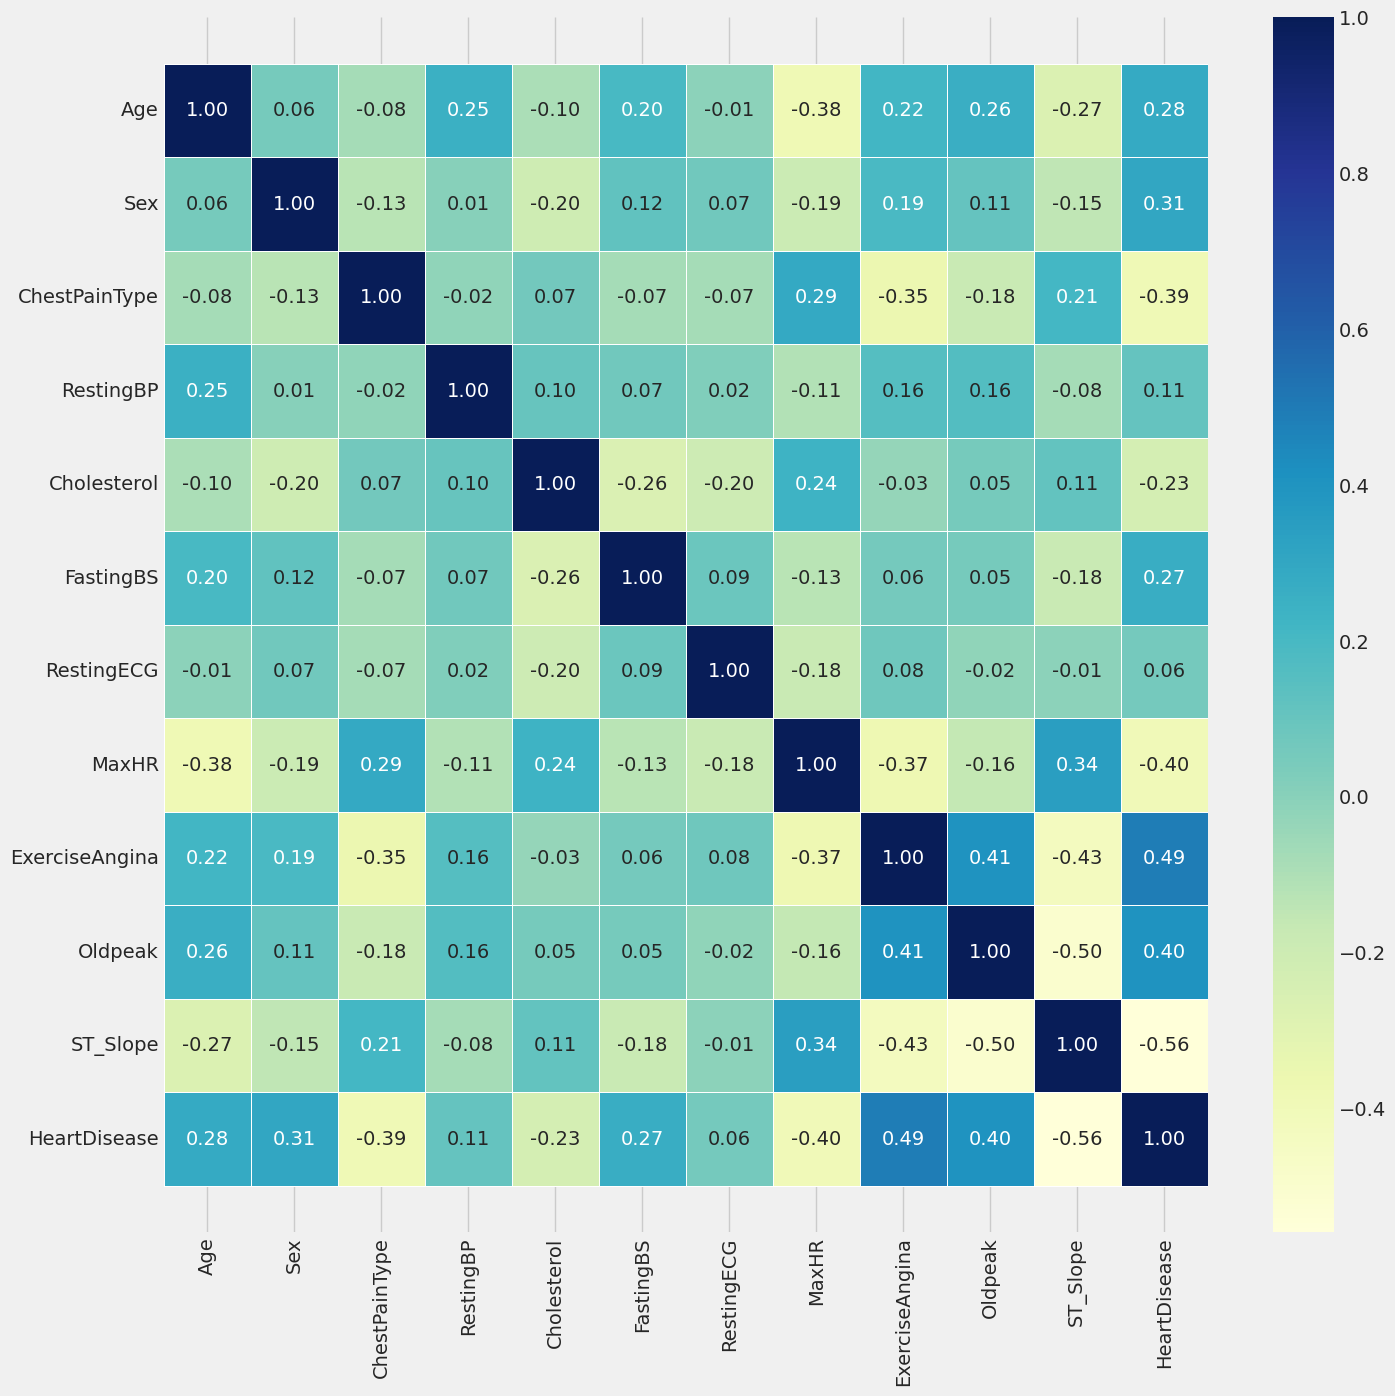

In [ ]:
# Let's make our correlation matrix a little prettier
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.410909,0.825070,0.0,1,1.382928,0,-0.832432,2,0
1,-0.478484,0,2,1.491752,-0.171961,0.0,1,0.754157,0,0.105664,1,1
2,-1.751359,1,1,-0.129513,0.770188,0.0,2,-1.525138,0,-0.832432,2,0
3,-0.584556,0,0,0.302825,0.139040,0.0,1,-1.132156,1,0.574711,1,1
4,0.051881,1,2,0.951331,-0.034755,0.0,1,-0.581981,0,-0.832432,2,0


# Model Training


Function for result generation (Training and validation)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

ModuleNotFoundError: No module named 'sklearn'

Dataset splitting (Train= 70% and Test=30%)

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop('HeartDisease', axis=1)
y = data.HeartDisease
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**3. Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    298.0  344.0       1.0      642.0         642.0
_______________________________________________
Confusion Matrix: 
 [[298   0]
 [  0 344]]

Test Result:
Accuracy Score: 76.81%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.673913    0.862319  0.768116    0.768116      0.785864
recall       0.830357    0.725610  0.768116    0.777983      0.768116
f1-score     0.744000    0.788079  0.768116    0.766040      0.770192
support    112.000000  164.000000  0.768116  276.000000    276.000000
_______________________________________________

**2. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    298.0  344.0       1.0      642.0         642.0
_______________________________________________
Confusion Matrix: 
 [[298   0]
 [  0 344]]

Test Result:
Accuracy Score: 89.13%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.859649    0.913580  0.891304    0.886615      0.891695
recall       0.875000    0.902439  0.891304    0.888720      0.891304
f1-score     0.867257    0.907975  0.891304    0.887616      0.891452
support    112.000000  164.000000  0.891304  276.000000    276.000000
_______________________________________________